In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# Read the data
df = pd.read_csv('platform.csv')

0.10549626275379605

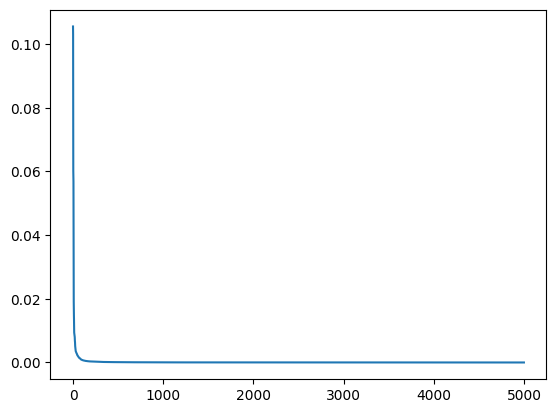

In [4]:
plt.plot(df['Samples Count']/df['Samples Count'].sum())
(df['Samples Count'][:1]/df['Samples Count'].sum()).sum()

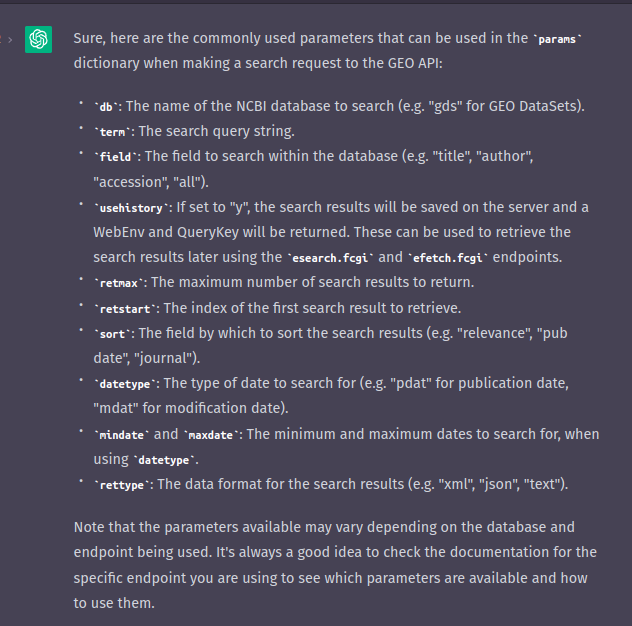

In [1]:
# Author: Chat GPT-3.5
# Co-Author: Me
import requests
import re
# Set the base URL for the GEO API
base_url = "https://eutils.ncbi.nlm.nih.gov/entrez/eutils/"

# Define your search query
query = 'gpl16791 AND "lung cancer"* AND treatment NOT ("single-cell") AND 20:10000[Number of Samples] ' 

# Set the search parameters
params = {
    "db": "gds",
    "term": query,
    "retmax": 1000, # Ez az én hozzájárulásom
    "retmode": "json",
    'sort':'SAMPLE_SIZE',
    'order':'descending'
}

# Send the search request
response = requests.get(base_url + "esearch.fcgi", params=params)
data = response.json()

# Get the list of data set IDs from the search results
id_list = data["esearchresult"]["idlist"]

In [2]:
mylist = [requests.get(base_url + "efetch.fcgi", params={"db": "gds", "id": id, "rettype": "xml"}) for id in id_list]
mylist = [el.content.decode('utf-8') for el in mylist]

In [3]:
# count the number of times a word occurs in a list
['SuperSeries' in el for el in mylist].count(True) # 0

11

In [4]:
mylist[0].split('\n')[-2].split(' ')

['Series\t\tAccession:', 'GSE186171\tID:', '200186171']

In [5]:
accession_numbers = [el.split('\n')[-2].split(' ')[1].split('\t')[0] for el in mylist if len(el.split('\n')[-2].split(' ')) == 3]

In [6]:
# check if the elements start with GS
[el.startswith('GS') for el in accession_numbers].count(True)/len(accession_numbers)

1.0

In [8]:
accession_number =  accession_numbers[6]
# Define a function to get the content of a GEO series or sample
get_content = lambda accession_number: requests.get(f"https://www.ncbi.nlm.nih.gov/geo/query/acc.cgi?acc={accession_number}&targ=self&form=text&view=brief").content.decode('utf-8')
# Accession number for the GEO dataset of interest
series_content = get_content(accession_number)
print(series_content)

^SERIES = GSE186341
!Series_title = 32 Kinase-Inhibitor Perturbed RNA sequencing of 11 cancer cell-lines
!Series_geo_accession = GSE186341
!Series_status = Public on Oct 28 2021
!Series_submission_date = Oct 21 2021
!Series_last_update_date = Feb 08 2022
!Series_pubmed_id = 35106508
!Series_summary = The goal of the CTD2 Pancancer Drug Activity DREAM Challenge is to foster the development and benchmarking of algorithms to predict targets of chemotherapeutic compounds from post-treatment transcriptional data.  The drug perturbational profiles on 11 cell lines for 32 kinase inhibitors with well-established targets were provided to challenge participants, without revealing the identity of the drugs. These profiles were used to predict the drug-targets of the 32 anonymized drugs using publically available datasets for training.
!Series_overall_design = 1728 RNAseq profiles of a cell-line perturbed with 32 kinase inhibitors.  Cell-lines were treated at a 48-hour IC20 for each drug and RNA w

In [9]:
super_series = []
no_good = []
good = []
maybe = []
for accession_number in accession_numbers:
    series_content = get_content(accession_number)
    overall_design = re.findall(r'!Series_overall_design = .*', series_content)[0]
    if overall_design.split('=')[-1] == ' Refer to individual Series\r':
        super_series.append([accession_number, overall_design])
    else:
        print(overall_design)
        inpt = input('g/n: ')
        if inpt == 'g':
            good.append([accession_number, overall_design])
        elif inpt == 'n':
            no_good.append([accession_number, overall_design])
        else:
            maybe.append([accession_number, overall_design])

!Series_overall_design = ChIP-Seq of human: we performed ChIP-Seq in a panel of LC cells after stimulation (30nM, 6 hours) with IFNγ in LC cell lines.
!Series_overall_design = Gene expression profiling (RNAseq) of a NSCLC cell line panel pre- and post-T-cell exposure as well as concordant pre- and post-cytotoxic T-cell samples.
!Series_overall_design = Species specific RNA-seq performed in control (C2) and resistant (R2) human cell populations growing in mouse brain when treated with vehicle or osimertinib. There are 6 in vivo sample groups each with 3-4 reps. The same control and resistant cell populations growing in culture and treated with vehicle or osimertinib were also sent for sequencing (3 reps each).
!Series_overall_design = Tumor biopsies collected either before or after utomilumab treatment were subjected to RNA-seq analysis
!Series_overall_design = 1728 RNAseq profiles of a cell-line perturbed with 32 kinase inhibitors.  Cell-lines were treated at a 48-hour IC20 for each dr

KeyboardInterrupt: Interrupted by user

In [14]:
import pandas as pd
df = pd.DataFrame(super_series, columns=['Accession Number', 'Content'])
df.to_csv('super_series.csv')

In [15]:
# import some modules so that i can grep from the text
import re
# i am looking for lines that start with '!Series_sample_id = ' in soft_file
greped_txt = re.findall(r'!Series_sample_id = .*', series_content)
samples = [el.split(' ')[-1][:-2] for el in greped_txt]

'!Series_overall_design = 1728 RNAseq profiles of a cell-line perturbed with 32 kinase inhibitors.  Cell-lines were treated at a 48-hour IC20 for each drug and RNA was collected at 24 hours to minimize cell-death.   Samples were prepared and sequences in batches of 96 that included 6 vehicle (DMSO) and 6 water controls.   2 replicates were taken for each drug-cell-line pair.\r'

In [19]:
print(get_content(samples[0]))

^SAMPLE = GSM564414
!Sample_title = EmbryonicSecondaryDuct_Age15 rep 1
!Sample_geo_accession = GSM564414
!Sample_status = Public on Jul 01 2011
!Sample_submission_date = Jul 08 2010
!Sample_last_update_date = Jul 01 2011
!Sample_type = RNA
!Sample_channel_count = 1
!Sample_source_name_ch1 = Salivary gland, replicate 1
!Sample_organism_ch1 = Mus musculus
!Sample_taxid_ch1 = 10090
!Sample_characteristics_ch1 = strain: ICR
!Sample_characteristics_ch1 = collection method: laser microdissection
!Sample_characteristics_ch1 = age: Embryonic day E15
!Sample_characteristics_ch1 = tissue: salivary gland
!Sample_characteristics_ch1 = salivary gland domain: Secondary Duct
!Sample_treatment_protocol_ch1 = No special treatment of pregnant mice.  Embryos were isolated from timed pregnancies, the salivary glands isolated and embedded in OCT on top of nucleopore filters.  The filters were removed, and the salivary glands sectioned at 10um.  The sections were stained, and specific locations isolated by 